# Predicting West Nile Virus

In [1]:
import pandas as pd
import numpy as np

In [2]:
path = '../../2_dataset/west_nile/'

In [3]:
train = pd.read_csv(path+'train.csv')
weather = pd.read_csv(path+'weather.csv')
spray = pd.read_csv(path+'spray.csv')
test = pd.read_csv(path+'test.csv')
sample_sub = pd.read_csv(path+'sampleSubmission.csv')

In [4]:
sample_sub.shape

(116293, 2)

In [5]:
train.head()

Date                                            Address  \
0  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
1  2007-05-29  4100 North Oak Park Avenue, Chicago, IL 60634,...   
2  2007-05-29  6200 North Mandell Avenue, Chicago, IL 60646, USA   
3  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   
4  2007-05-29    7900 West Foster Avenue, Chicago, IL 60656, USA   

                  Species  Block           Street  Trap  \
0  CULEX PIPIENS/RESTUANS     41   N OAK PARK AVE  T002   
1          CULEX RESTUANS     41   N OAK PARK AVE  T002   
2          CULEX RESTUANS     62    N MANDELL AVE  T007   
3  CULEX PIPIENS/RESTUANS     79     W FOSTER AVE  T015   
4          CULEX RESTUANS     79     W FOSTER AVE  T015   

              AddressNumberAndStreet   Latitude  Longitude  AddressAccuracy  \
0  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
1  4100  N OAK PARK AVE, Chicago, IL  41.954690 -87.800991                9   
2   6200  N MANDELL AVE, Chicago, IL  41.994991 -87.769279                9   
3    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   
4    7900  W FOSTER AVE, Chicago, IL  41.974089 -87.824812                8   

   NumMosquitos  WnvPresent  
0             1           0  
1             1           0  
2             1           0  
3             1           0  
4             4           0

In [6]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [7]:
train.shape

(10506, 12)

In [8]:
weather.describe()

Station         Tmax         Tmin     DewPoint  ResultSpeed  \
count  2944.000000  2944.000000  2944.000000  2944.000000  2944.000000   
mean      1.500000    76.166101    57.810462    53.457880     6.960666   
std       0.500085    11.461970    10.381939    10.675181     3.587527   
min       1.000000    41.000000    29.000000    22.000000     0.100000   
25%       1.000000    69.000000    50.000000    46.000000     4.300000   
50%       1.500000    78.000000    59.000000    54.000000     6.400000   
75%       2.000000    85.000000    66.000000    62.000000     9.200000   
max       2.000000   104.000000    83.000000    75.000000    24.100000   

         ResultDir  
count  2944.000000  
mean     17.494905  
std      10.063609  
min       1.000000  
25%       7.000000  
50%      19.000000  
75%      25.000000  
max      36.000000

In [9]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [10]:
weather.head()

Station        Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1  2007-05-01    83    50   67     14        51      56    0    2   
1        2  2007-05-01    84    52   68      M        51      57    0    3   
2        1  2007-05-02    59    42   51     -3        42      47   14    0   
3        2  2007-05-02    60    43   52      M        42      47   13    0   
4        1  2007-05-03    66    46   56      2        40      48    9    0   

     ...    CodeSum Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0    ...                0      M      0.0        0.00       29.10    29.82   
1    ...                M      M        M        0.00       29.18    29.82   
2    ...         BR     0      M      0.0        0.00       29.38    30.09   
3    ...      BR HZ     M      M        M        0.00       29.44    30.08   
4    ...                0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir  AvgSpeed  
0         1.7        27       9.2  
1         2.7        25       9.6  
2        13.0         4      13.4  
3        13.3         2      13.4  
4        11.7         7      11.9  

[5 rows x 22 columns]

In [11]:
# merge weather onto training data
train_weather = pd.merge(train, weather, left_on='Date', right_on='Date',how='left')

## Setting up the data

In [12]:
# Transformt the Date variable to a datetime format.
weather["Date"] = pd.to_datetime(train["Date"],errors='coerce',infer_datetime_format=True)

In [13]:
# add day of year
weather['DayofYear']= weather.Date.dt.dayofyear
weather.head()

Station       Date  Tmax  Tmin Tavg Depart  DewPoint WetBulb Heat Cool  \
0        1 2007-05-29    83    50   67     14        51      56    0    2   
1        2 2007-05-29    84    52   68      M        51      57    0    3   
2        1 2007-05-29    59    42   51     -3        42      47   14    0   
3        2 2007-05-29    60    43   52      M        42      47   13    0   
4        1 2007-05-29    66    46   56      2        40      48    9    0   

     ...     Depth Water1 SnowFall PrecipTotal StnPressure SeaLevel  \
0    ...         0      M      0.0        0.00       29.10    29.82   
1    ...         M      M        M        0.00       29.18    29.82   
2    ...         0      M      0.0        0.00       29.38    30.09   
3    ...         M      M        M        0.00       29.44    30.08   
4    ...         0      M      0.0        0.00       29.39    30.12   

  ResultSpeed ResultDir AvgSpeed  DayofYear  
0         1.7        27      9.2        149  
1         2.7        25      9.6        149  
2        13.0         4     13.4        149  
3        13.3         2     13.4        149  
4        11.7         7     11.9        149  

[5 rows x 23 columns]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5);

Text(0,0.5,'Frequency')

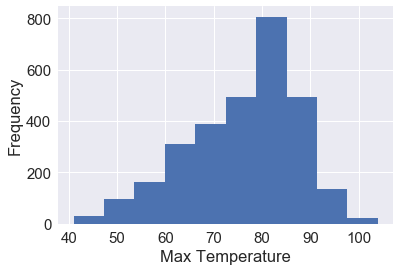

In [15]:
weather.Tmax.plot(kind='hist')
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')

Text(0,0.5,'Frequency')

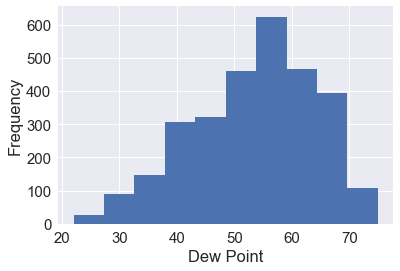

In [16]:
weather.DewPoint.plot(kind='hist')
plt.xlabel('Dew Point')
plt.ylabel('Frequency')


In [17]:
train_weather.DayofYear.describe()

AttributeError: 'DataFrame' object has no attribute 'DayofYear'

In [18]:
weather.groupby('DayofYear').describe()

DewPoint                                                        \
             count       mean        std   min    25%   50%    75%   max   
DayofYear                                                                  
149           25.0  43.840000   8.778193  30.0  39.00  42.0  51.00  60.0   
156           60.0  49.983333   8.658280  30.0  46.00  50.0  57.00  63.0   
177           70.0  57.942857   6.451347  46.0  52.00  56.0  64.75  70.0   
180           46.0  62.282609   6.581668  52.0  57.00  62.0  67.75  73.0   
183           74.0  59.756757   8.715929  33.0  55.00  61.5  67.00  71.0   
192          152.0  45.868421   9.492196  30.0  38.00  44.5  52.25  67.0   
199          129.0  59.193798   6.996738  46.0  53.00  59.0  66.00  71.0   
200           45.0  59.533333   4.836415  52.0  57.00  59.0  61.00  69.0   
206           92.0  53.804348   7.445390  38.0  50.75  55.0  58.00  71.0   
208           83.0  40.409639   8.761106  23.0  34.00  40.0  44.00  58.0   
213          551.0  55.511797   9.680691  22.0  49.00  57.0  62.00  72.0   
214          137.0  49.430657   9.792551  29.0  43.00  49.0  55.00  69.0   
215            5.0  29.200000   2.588436  26.0  27.00  30.0  31.00  32.0   
219          184.0  56.059783  11.253255  29.0  49.00  59.0  64.00  75.0   
220           93.0  60.494624   6.977641  43.0  56.00  60.0  67.00  73.0   
221           26.0  48.576923   6.287595  35.0  45.25  49.0  53.00  58.0   
227          276.0  52.518116  10.687786  29.0  45.00  53.0  62.00  71.0   
228           93.0  53.494624   9.087286  33.0  47.00  54.0  60.00  70.0   
229           54.0  43.574074  10.454938  24.0  35.25  45.0  51.75  62.0   
233          186.0  53.360215  12.226879  26.0  44.00  54.5  63.00  74.0   
234          139.0  57.266187   7.064481  41.0  51.50  57.0  63.50  70.0   
236          186.0  49.344086  11.501816  25.0  41.00  50.0  58.75  71.0   
240          120.0  60.008333   6.447585  47.0  55.00  60.0  65.00  73.0   
247           92.0  49.347826   8.727165  34.0  43.00  49.0  54.25  69.0   
248           26.0  39.038462   6.427944  25.0  34.25  39.5  41.00  52.0   

          ResultDir             ...    Tmax          Tmin             \
              count       mean  ...     75%    max  count       mean   
DayofYear                       ...                                    
149            25.0  10.960000  ...   82.00   84.0   25.0  51.000000   
156            60.0  17.683333  ...   86.00   92.0   60.0  56.283333   
177            70.0  16.171429  ...   89.00   94.0   70.0  64.528571   
180            46.0  13.760870  ...   88.00   92.0   46.0  67.065217   
183            74.0  15.364865  ...   86.00   91.0   74.0  63.243243   
192           152.0  17.953947  ...   78.00   91.0  152.0  50.006579   
199           129.0  20.217054  ...   86.00   91.0  129.0  63.279070   
200            45.0  15.666667  ...   84.00   90.0   45.0  64.511111   
206            92.0  18.021739  ...   81.00   95.0   92.0  56.521739   
208            83.0  21.578313  ...   71.00   86.0   83.0  45.915663   
213           551.0  17.196007  ...   84.00   95.0  551.0  59.154265   
214           137.0  19.452555  ...   81.00   94.0  137.0  54.781022   
215             5.0  25.800000  ...   50.00   63.0    5.0  36.800000   
219           184.0  13.646739  ...   88.00  101.0  184.0  59.663043   
220            93.0  17.150538  ...   86.00   94.0   93.0  64.000000   
221            26.0  17.461538  ...   68.00   75.0   26.0  51.461538   
227           276.0  17.963768  ...   90.00  104.0  276.0  59.365942   
228            93.0  19.301075  ...   86.00   94.0   93.0  58.870968   
229            54.0  20.592593  ...   69.00   81.0   54.0  45.740741   
233           186.0  15.026882  ...   85.00   97.0  186.0  57.543011   
234           139.0  17.129496  ...   85.00   96.0  139.0  61.309353   
236           186.0  17.236559  ...   82.00   93.0  186.0  52.913978   
240           120.0  18.400000  ...   86.00   92.0  120.0  64.808333   
247      

In [19]:
weather.meantemp=weather.groupby('DayofYear').Tmax.mean()

Text(0,0.5,'Frequency')

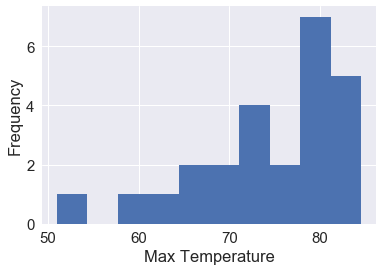

In [20]:
weather.meantemp.plot(kind='hist')
plt.xlabel('Max Temperature')
plt.ylabel('Frequency')

In [21]:
# compare with scatter plot
weather.plot(x='DayofYear',y='meantemp',kind='scatter')

KeyError: 'meantemp'

In [22]:
pd.scatter_matrix(weather[['meantemp', 'DayofYear']]

SyntaxError: unexpected EOF while parsing (<ipython-input-22-6568ab67937a>, line 1)

In [ ]:
bar=train.WnvPresent.value_counts().sort_index()

In [ ]:
bar.plot(kind='bar')


In [ ]:
# What's the breakdown by species?
train.Species.value_counts().sort_index()

In [ ]:
# species
train.Species.value_counts().plot(kind='bar')

In [ ]:
# Looks like only 3 species are associated with the presence of WNV
train.groupby('Species').WnvPresent.mean()

In [ ]:
# Let's check that out
byspecies = train.groupby('Species')
byspecies.head()

## EDA and data transformation

In [ ]:
# use a lambda function to create a dummy variable about the "present" speci\es
train['PositiveSpecies'] = train.Species.apply(lambda x: 1 if x in ['CULEX PIPIENS/RESTUANS','CULEX RESTUANS','CULEX PIPIENS'] else 0)

In [ ]:
# examine this new variable
train.groupby('PositiveSpecies').WnvPresent.mean()

In [ ]:
# what's the earliest date when a positive species was detected?
train.groupby('PositiveSpecies').Date.min()

In [ ]:
train.DayofYear.head()

In [ ]:
# plot the presence of WNV by date (this graph needs to be improved)
bydate = train.set_index('DayofYear')
bydate.WnvPresent.plot()

In [ ]:
# use a lambda function to create a dummy about whether the month was July thru Sept.
train['Jul-Sep'] = train.Date.apply(lambda x: 1 if x.month in [7,8,9] else 0)

In [ ]:
# explore that new variable.
train['Jul-Sep'].value_counts().sort_index()

In [ ]:
# what's the percentage of WNV, by the species dummy?
train.groupby(['PositiveSpecies']).WnvPresent.mean()

In [ ]:
# what's the percentage of WNV, by the seasonal dummy?
train.groupby(['Jul-Sep']).WnvPresent.mean()

### Logistic Regression Analysis

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_weather[['DayofYear', 'PositiveSpecies']]
y = train_weather.WnvPresent

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
# import
from sklearn.linear_model import LogisticRegression
# Create an instance of the logistic regression model 
logreg = LogisticRegression()
# Fit (train) the model on the training data.
logreg.fit(X_train,y_train)

In [ ]:
# what are the dimensions of the dataframe before splitting?
print(X.shape)

# after splitting?
print(X_train.shape)
print(X_test.shape)

In [ ]:
# predict values for the testing data
predictions = logreg.predict(X_test)
Y_pred = logreg.predict(X_test)

### Create a classification report for the model

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

### Accuracy score

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predictions)
print(acc)

In [ ]:
print(confusion_matrix(y_test,predictions))

In [ ]:
# compare testing accuracy to null score
y_test.value_counts().head(1) / len(y_test)

In [ ]:
# plot the predicted probabilities
plt.scatter(train['PositiveSpecies'], train.WnvPresent)
plt.plot(train['PositiveSpecies'], train.WnvPresent, color='red')
plt.xlabel('PositiveSpecies')
plt.ylabel('WnvPresent')

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# plt.style.use('seaborn-white')
%matplotlib inline

In [ ]:
y_score = logreg.decision_function(X_test)
FPR = dict()
TPR = dict()
ROC_AUC = dict()

In [ ]:
# For class 1, find the area under the curve
FPR[1], TPR[1], _ = roc_curve(y_test, y_score)
ROC_AUC[1] = auc(FPR[1], TPR[1])

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for WNV detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [ ]:
import os
os.listdir('/Users/austinlasseter/ds-dc-23/1_lessons/17-Kaggle-WestNile/maps')

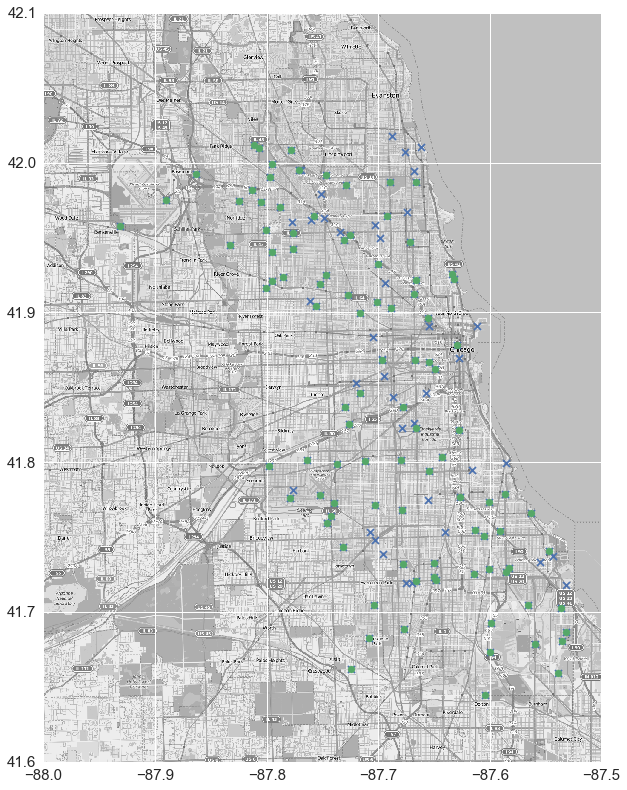

In [23]:
# Hat tip to DSI graduates Nicole Eickhoff & Nike Qiang for this code!
mapdata = np.loadtxt("maps/mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv(path+'train.csv')[['Date', 'Species', 'Trap','Longitude', 'Latitude', 'WnvPresent']]

aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

plt.figure(figsize=(10,14))
plt.imshow(mapdata, 
           cmap=plt.get_cmap('gray'), 
           extent=lon_lat_box, 
           aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values

locations_with_virus = traps[traps.WnvPresent==1][['Longitude', 'Latitude']].drop_duplicates().values

plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(locations_with_virus[:,0], locations_with_virus[:,1], marker='o')
# how many have a culex ; vis by season / pos rate ; vis by humidity ; vis by temp ; vis by wind

In [ ]:

plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.scatter(locations_with_virus[:,0], locations_with_virus[:,1], marker='o')